In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Import data

In [3]:
# Load data w/ dictionary to hold the DataFrames
data=[]
df_prot = {}
subdir=[]

dir='/home/cadeniran/storage/ampatel3/memscan/screw_10/results_grid/'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()

for i in subdir:
    os.chdir("/home/cadeniran/storage/ampatel3/memscan/screw_10/results_grid/"+str(i))
    data = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
    df_prot[str(i)] = pd.DataFrame(data)

In [4]:
for i in subdir:
    print(str(i)+":" , df_prot[str(i)].loc[:, 'RMSD'].mean().round(2))

0.1_15: 17.26
0.1_20: 17.18
0.1_25: 16.03
0.1_30: 18.28
0.1_35: 18.46
0.1_40: 21.86
0.1_45: 19.68
0.1_50: 23.6
0.2_15: 15.21
0.2_20: 18.61
0.2_25: 19.24
0.2_30: 19.28
0.2_35: 19.75
0.2_40: 18.98
0.2_45: 17.9
0.2_50: 18.71
0.3_15: 16.55
0.3_20: 16.91
0.3_25: 17.7
0.3_30: 16.1
0.3_35: 21.07
0.3_40: 19.88
0.3_45: 20.69
0.3_50: 21.57
0.4_15: 16.15
0.4_20: 16.98
0.4_25: 16.4
0.4_30: 19.42
0.4_35: 21.74
0.4_40: 19.11
0.4_45: 17.9
0.4_50: 18.84
0.5_15: 15.05
0.5_20: 14.85
0.5_25: 17.34
0.5_30: 17.56
0.5_35: 16.65
0.5_40: 15.76
0.5_45: 22.99
0.5_50: 20.08
0.6_15: 16.59
0.6_20: 15.91
0.6_25: 17.76
0.6_30: 17.42
0.6_35: 17.56
0.6_40: 21.13
0.6_45: 19.09
0.6_50: 19.46
0.7_15: 15.43
0.7_20: 15.05
0.7_25: 17.82
0.7_30: 18.52
0.7_35: 16.83
0.7_40: 21.01
0.7_45: 17.68
0.7_50: 20.01
0.8_15: 15.38
0.8_20: 17.38
0.8_25: 16.98
0.8_30: 16.28
0.8_35: 17.67
0.8_40: 16.59
0.8_45: 19.2
0.8_50: 18.54


### Define data groupings

In [10]:
highrmsd = pd.DataFrame({'0.1_40': df_prot["0.1_40"]["RMSD"],
                       '0.1_50': df_prot["0.1_50"]["RMSD"],
                       '0.4_35': df_prot["0.4_35"]["RMSD"],
                       '0.5_45': df_prot["0.5_45"]["RMSD"],
                       '0.7_40': df_prot["0.7_40"]["RMSD"]})

In [11]:
lowrmsd = pd.DataFrame({'0.2_15': df_prot["0.2_15"]["RMSD"],
                       '0.3_30': df_prot["0.3_30"]["RMSD"],
                       '0.5_15': df_prot["0.5_15"]["RMSD"],
                       '0.5_40': df_prot["0.5_40"]["RMSD"],
                       '0.8_15': df_prot["0.8_15"]["RMSD"]})

## Plots

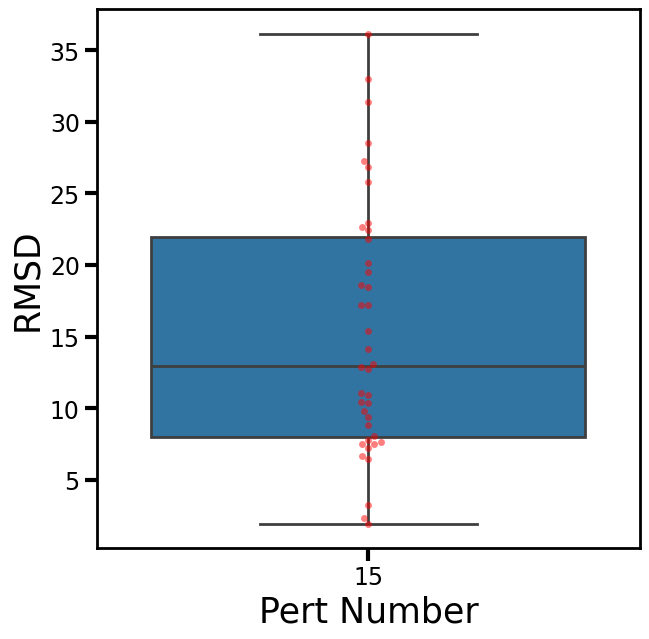

In [7]:
ax = sns.boxplot(x="pert_num", y="RMSD", data=df_prot["0.8_15"], showfliers = True, linewidth=2)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=df_prot["0.8_15"], color="r", alpha=0.5)

#ax.set_ylim([0, 26])
plt.xlabel("Pert Number", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

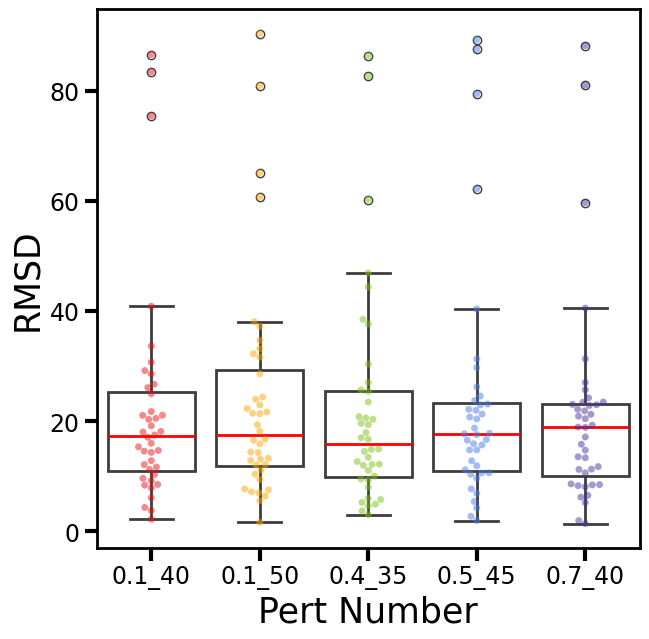

In [12]:
plt.rcParams['figure.figsize'] = 7,7
colors = ['#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d']

ax = sns.boxplot(data=highrmsd, linewidth=2, color="white", medianprops=dict(color="red", alpha=1),)
ax = sns.swarmplot(data=highrmsd, palette=colors, alpha=0.5)

#ax.set_ylim([0, 27])
plt.xlabel("Pert Number", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

plt.savefig("/home/cadeniran/ipn/figs/highrmsd.png", transparent=True, bbox_inches='tight')

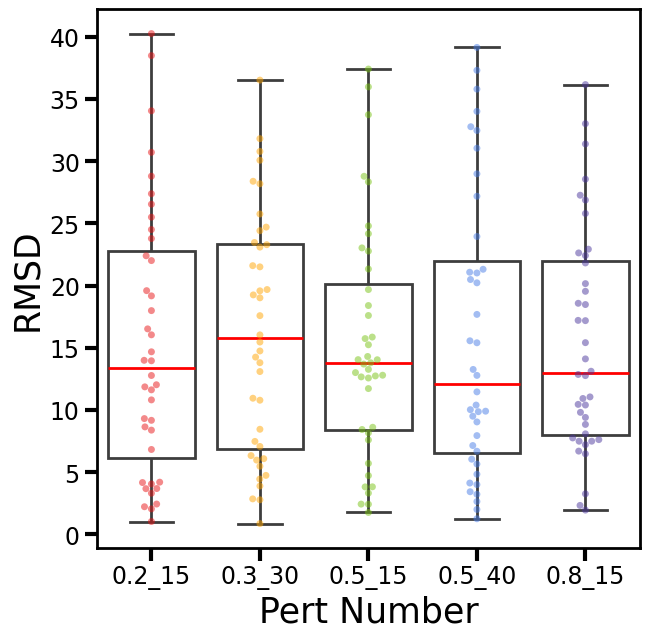

In [13]:
plt.rcParams['figure.figsize'] = 7,7
colors = ['#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d']

ax = sns.boxplot(data=lowrmsd, linewidth=2, color="white", medianprops=dict(color="red", alpha=1),)
ax = sns.swarmplot(data=lowrmsd, palette=colors, alpha=0.5)

#ax.set_ylim([0, 27])
plt.xlabel("Pert Number", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

plt.savefig("/home/cadeniran/ipn/figs/lowrmsd.png", transparent=True, bbox_inches='tight')